`April 13, 2022`

# Time Series Data

Time series is a sequence of observations recorded at a regular time 
The frequency could be Yearly, Monthly, Daily or even milliseconds 
Not necessarily within the same interval
The data analysis for time series is inherently different compared to the other data because: 
It is time dependent 
Time series could contain trend, cycle and seasonality


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_shampoo = pd.read_csv('shampoo_sales.csv')

This dataset describes the monthly number of sales of shampoo over a 3 year period.

The units are a sales count and there are 36 observations. The original dataset is credited to Makridakis, Wheelwright and Hyndman (1998)

Only one variable


In [3]:
df_shampoo.index = range(1,37)

In [4]:
df_shampoo.head()

,Month,Sales
1,1-01,266.0
2,1-02,145.9
3,1-03,183.1
4,1-04,119.3
5,1-05,180.3


In [5]:
df_shampoo.tail()

,Month,Sales
32,3-08,407.6
33,3-09,682.0
34,3-10,475.3
35,3-11,581.3
36,3-12,646.9


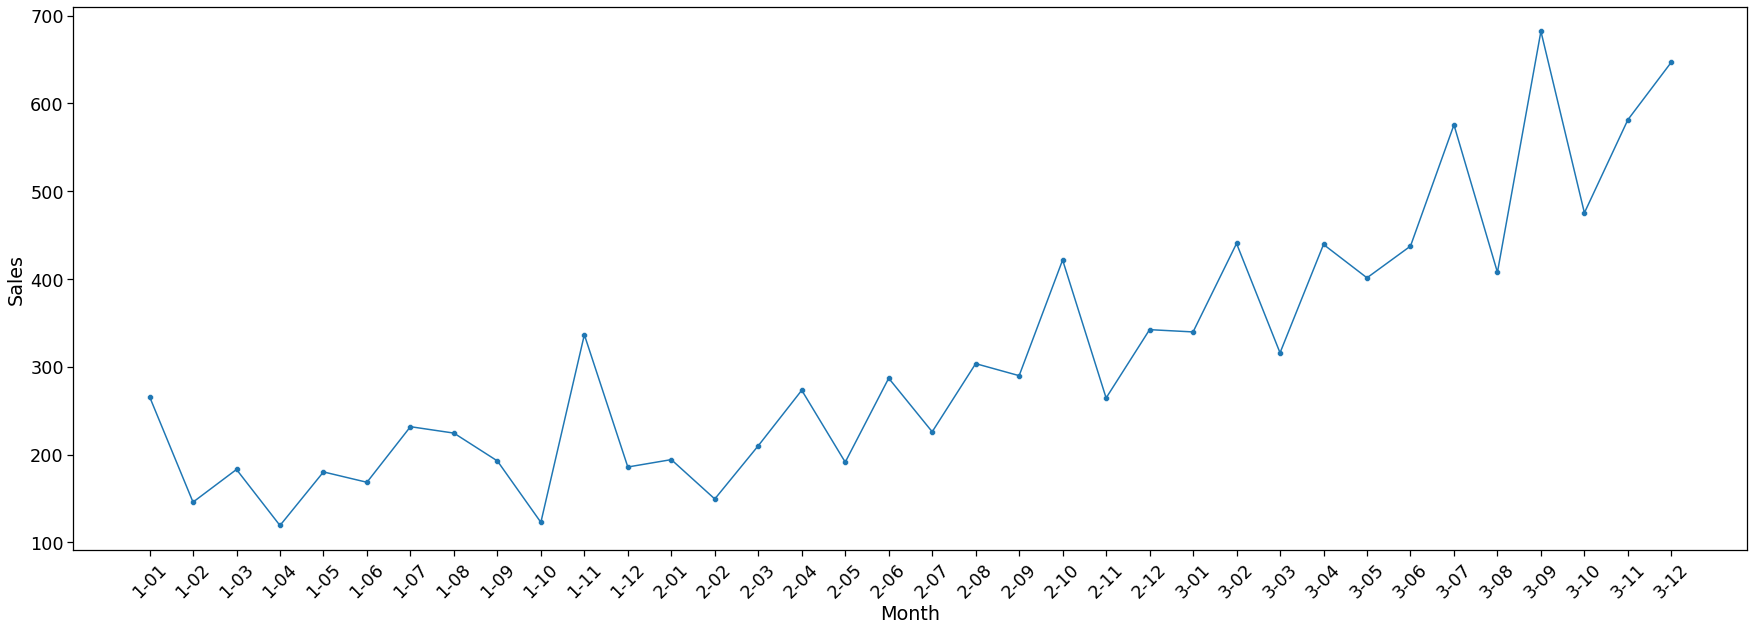

In [6]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.xticks(rotation=45)

plt.show()

# Time Series Pattern

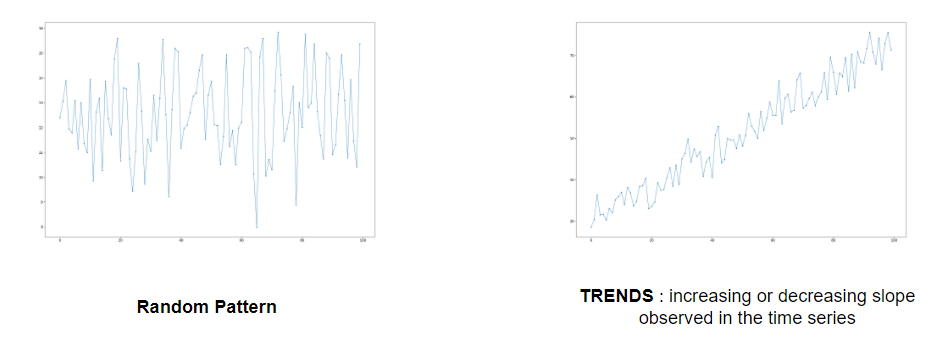

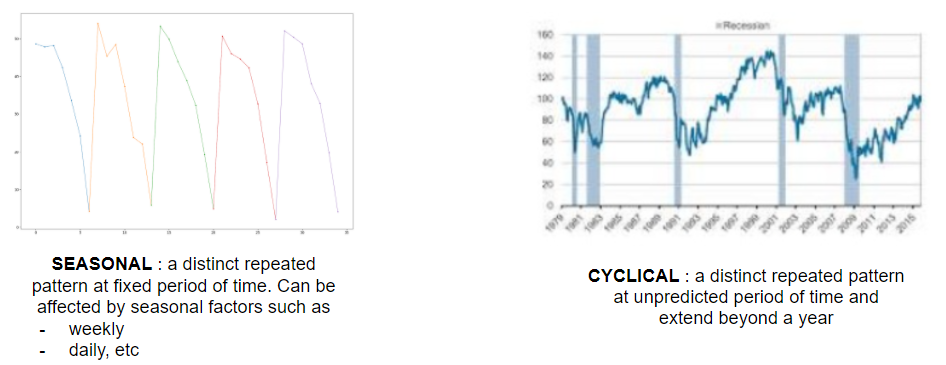

> ## Random Process

Just random pattern.

In [7]:
y = np.random.normal(13,2,100)
indexes = range(0,100)

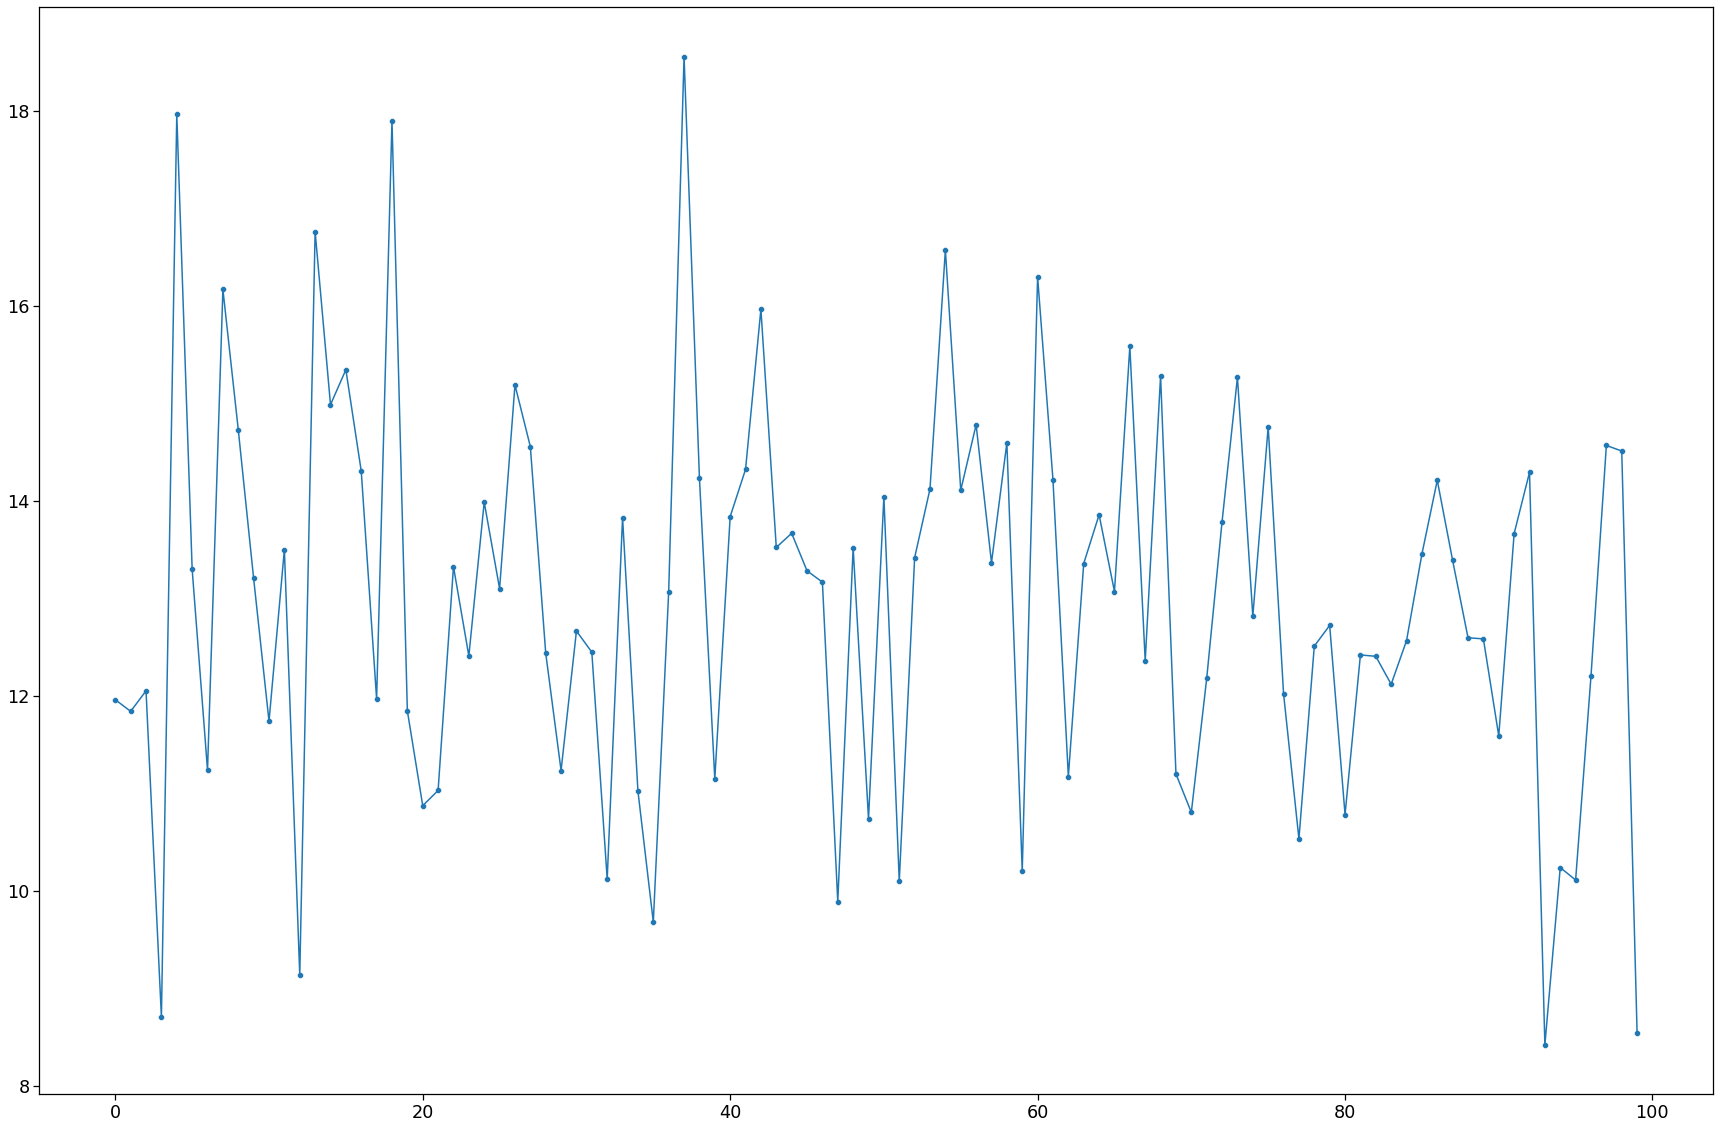

In [8]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

> ## Trends

increasing or decreasing slope observed in the time series

In [9]:
indexes = range(0,100)
y = [30 + 0.43*i + np.random.normal(0,3,1).item() for i in indexes]

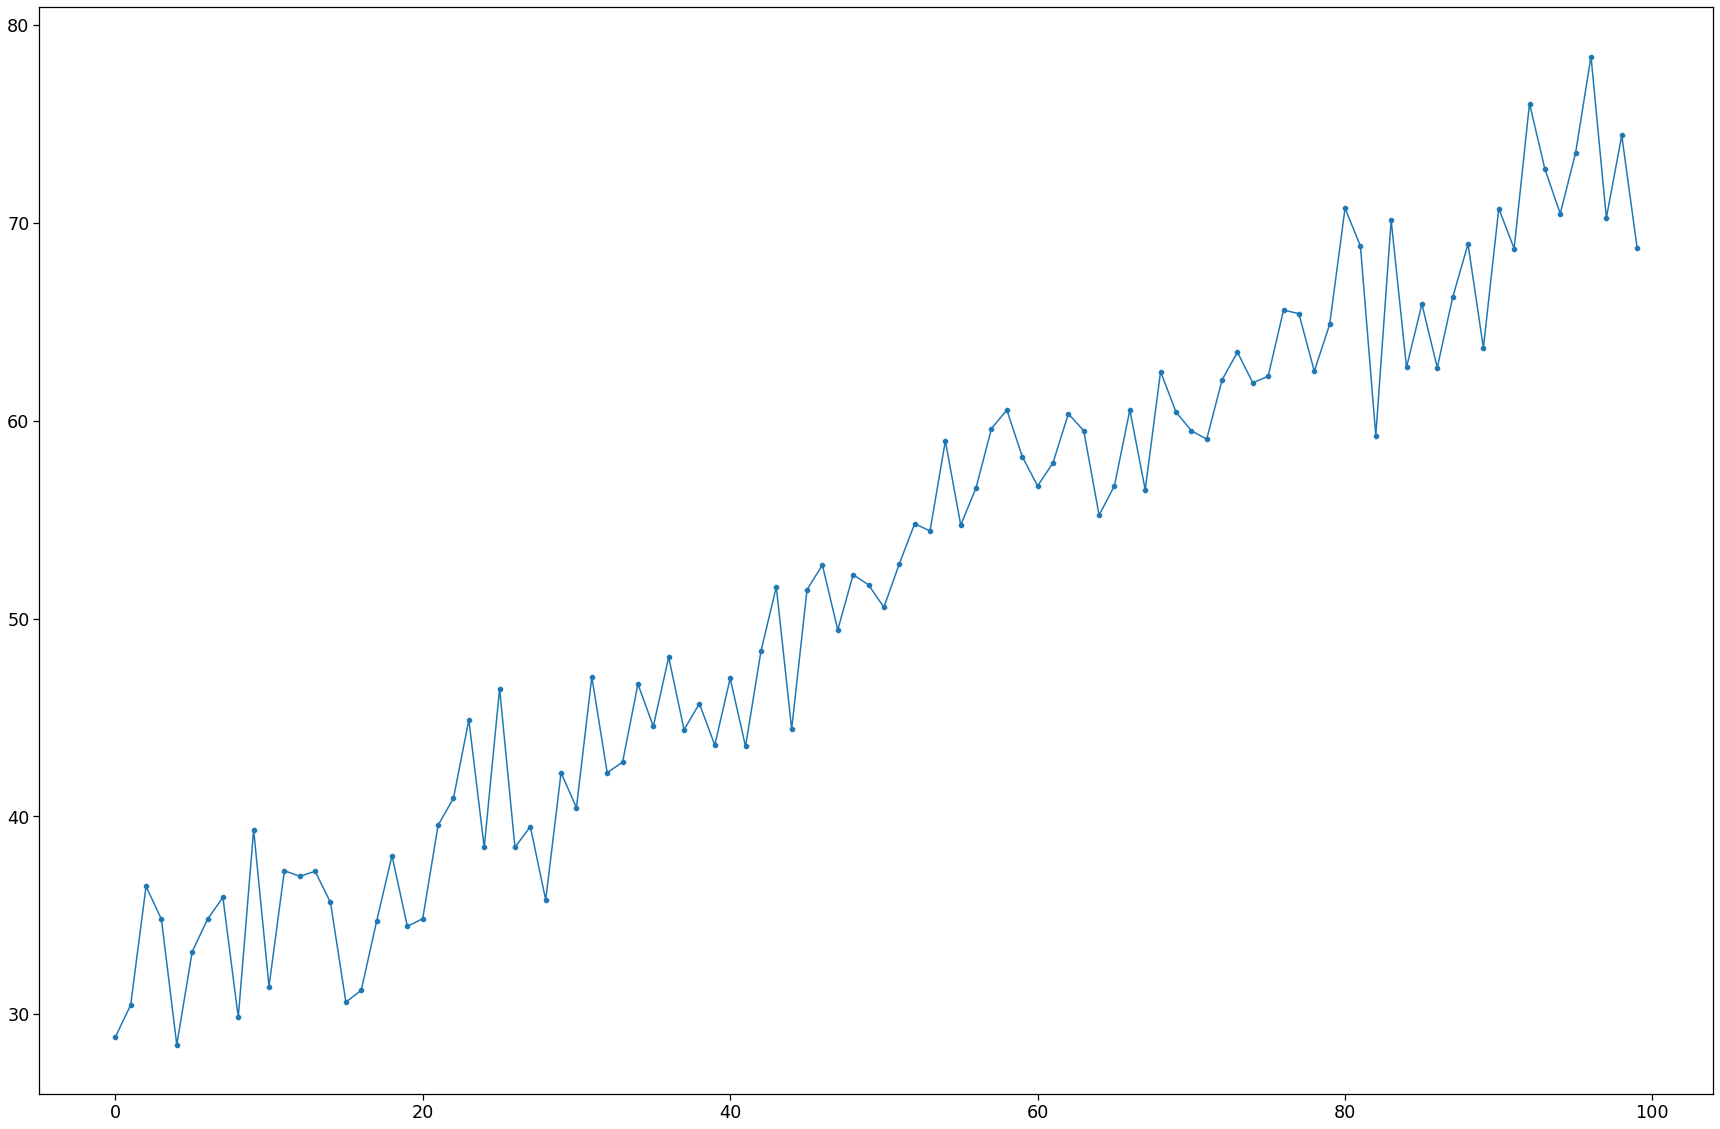

In [10]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

> ## Seasonal

 a distinct repeated pattern at fixed period of time. Can be affected by seasonal factors such as
- weekly
- daily, etc


In [11]:
indexes = range(0,35)
y = [50 + 0.43*(i%7) - 1.3*(i%7)**2 + np.random.normal(0,3,1).item() for i in indexes]

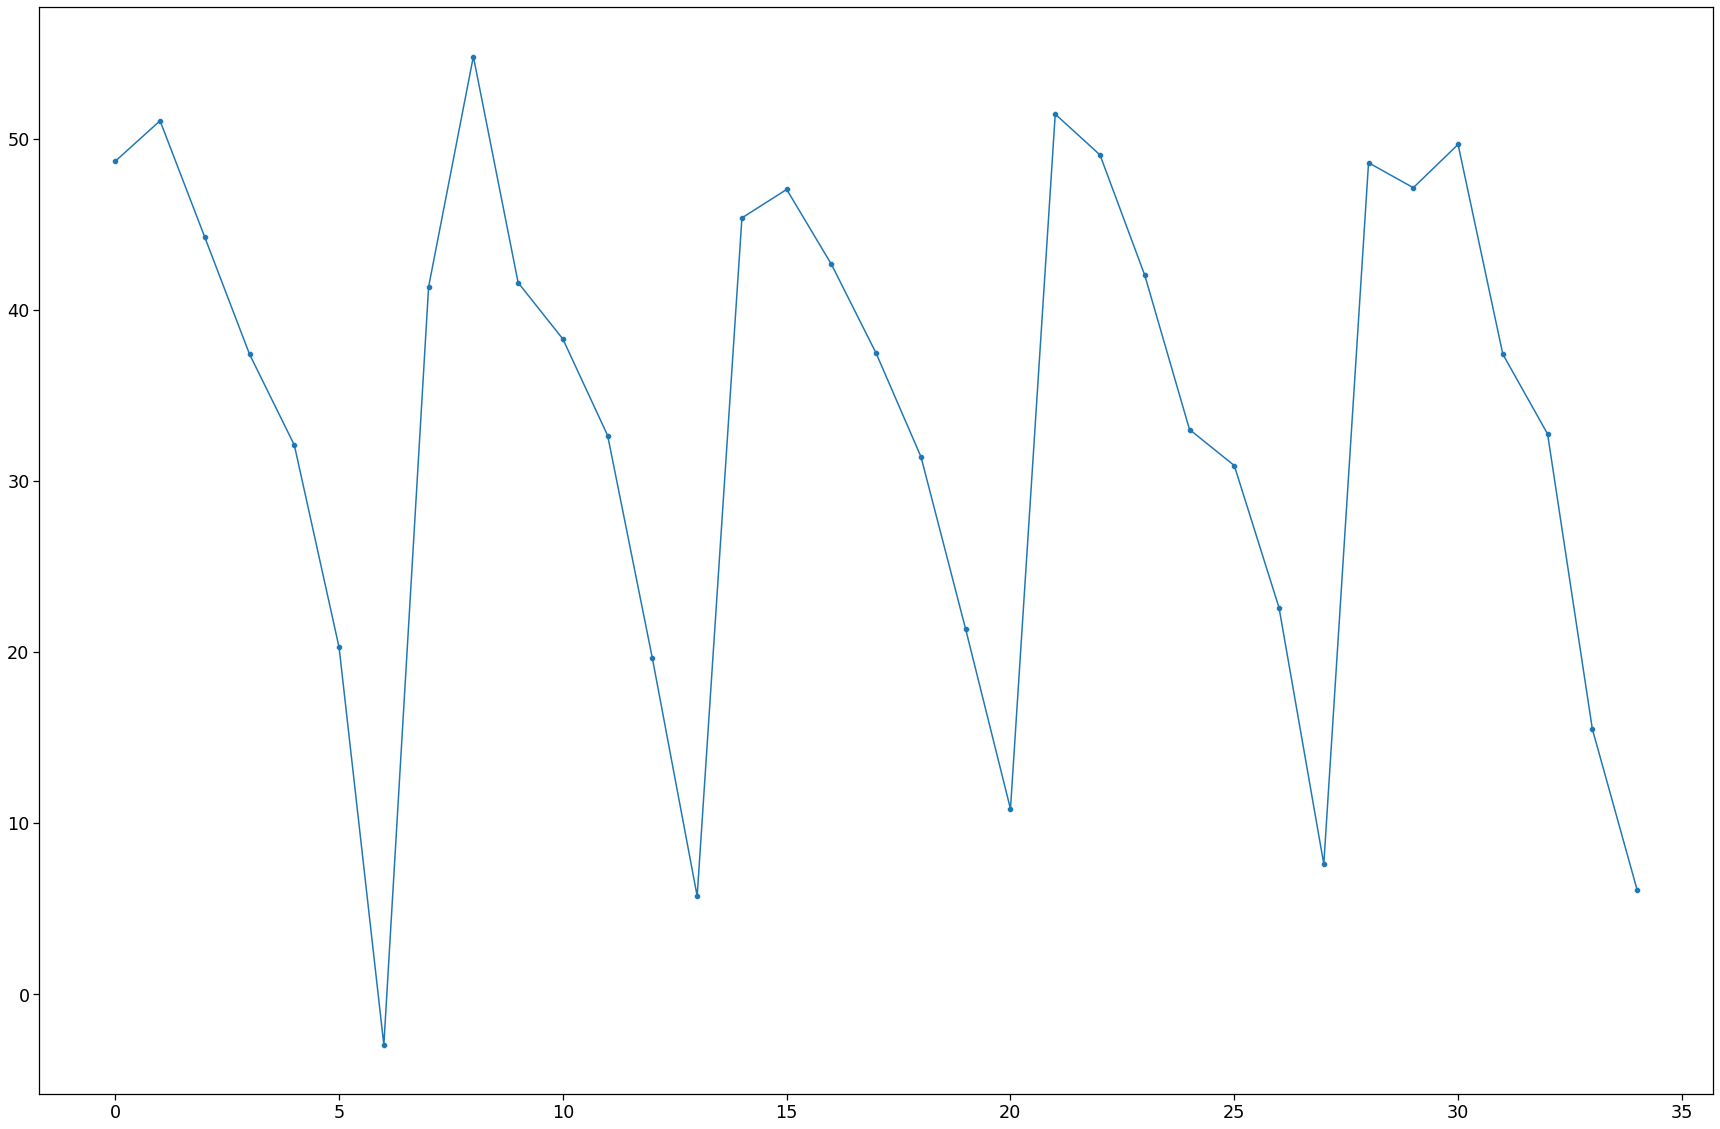

In [12]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = indexes, y = y)
sns.lineplot(x = indexes, y = y)

plt.show()

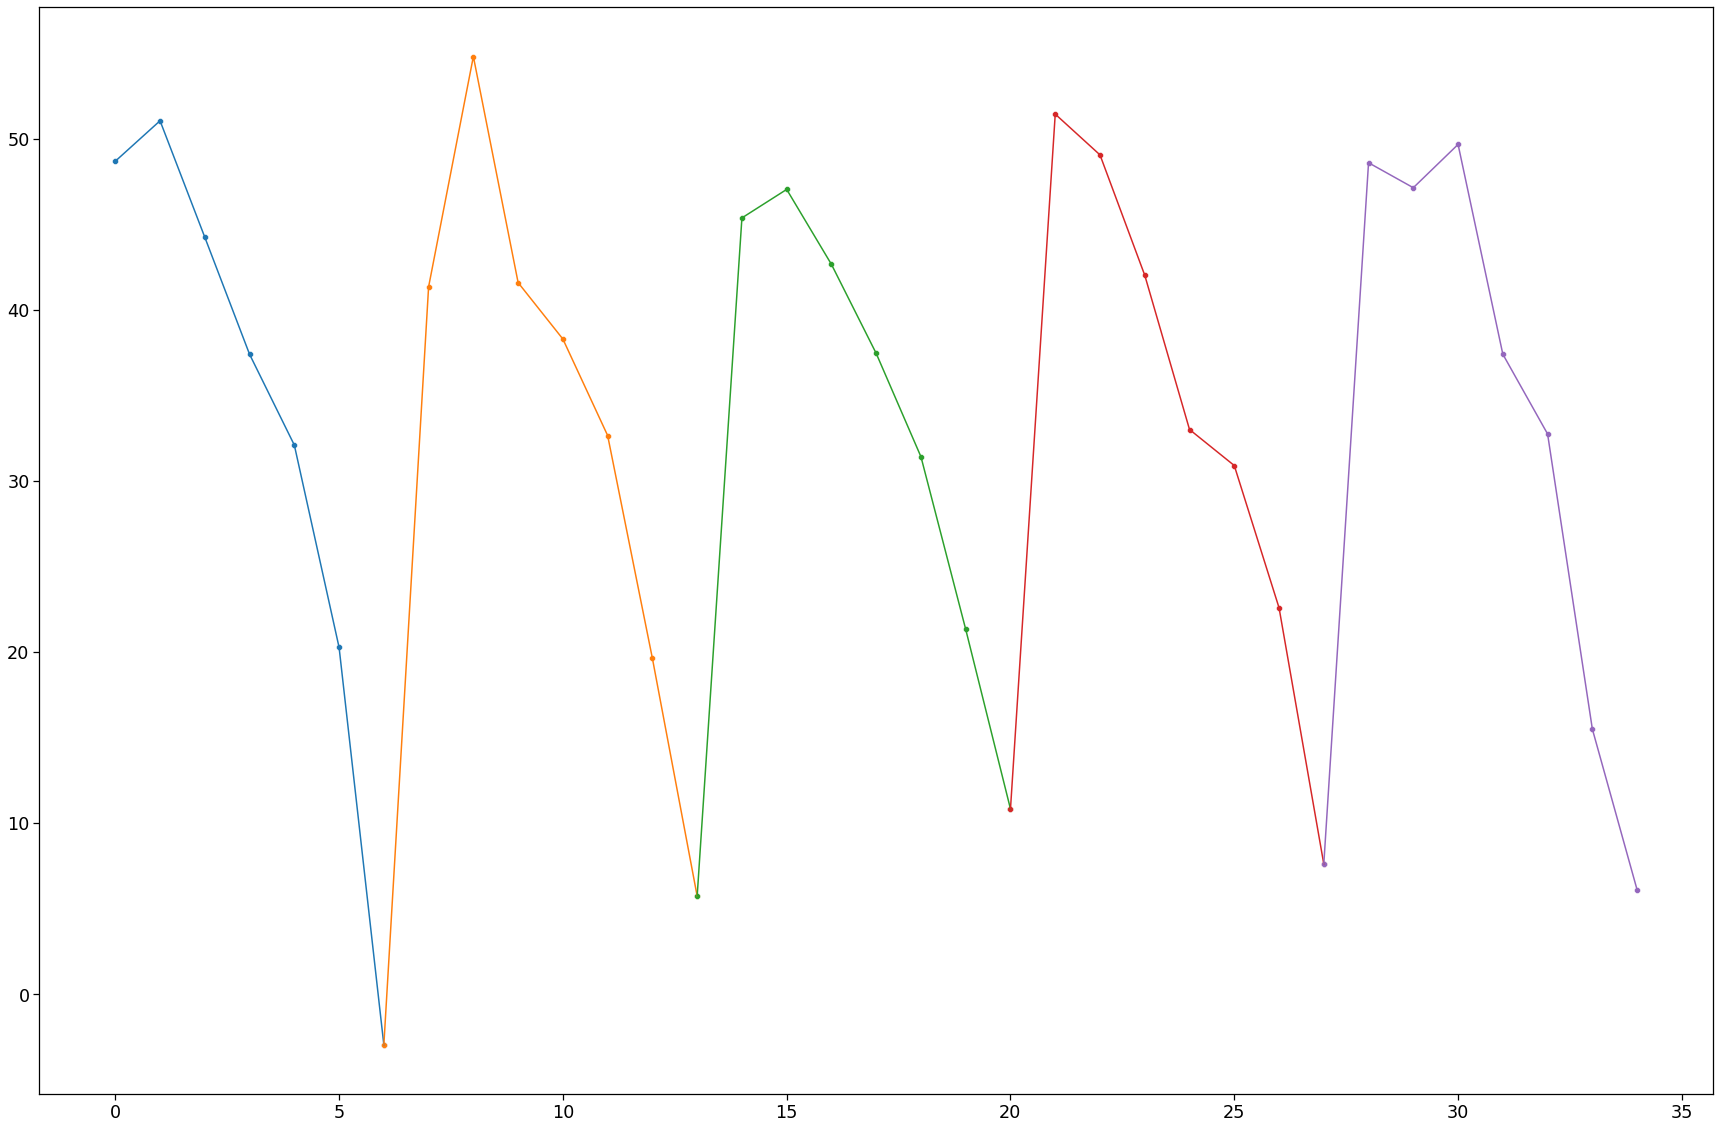

In [13]:
plt.figure(figsize = (30,20))

sns.set_context(context = 'notebook', font_scale=1.6)

for i,j in zip([0,6,13,20,27],[7,14,21,28,35]):
  sns.scatterplot(x = indexes[i:j], y = y[i:j])
  sns.lineplot(x = indexes[i:j], y = y[i:j])

plt.show()

> ## Decomposition

In [14]:
import plotly.graph_objects as go

In [15]:
url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url,sep=",")

In [16]:
fig = go.Figure([go.Scatter(name = 'true',x=df['Date'], y=df['Consumption'])])
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

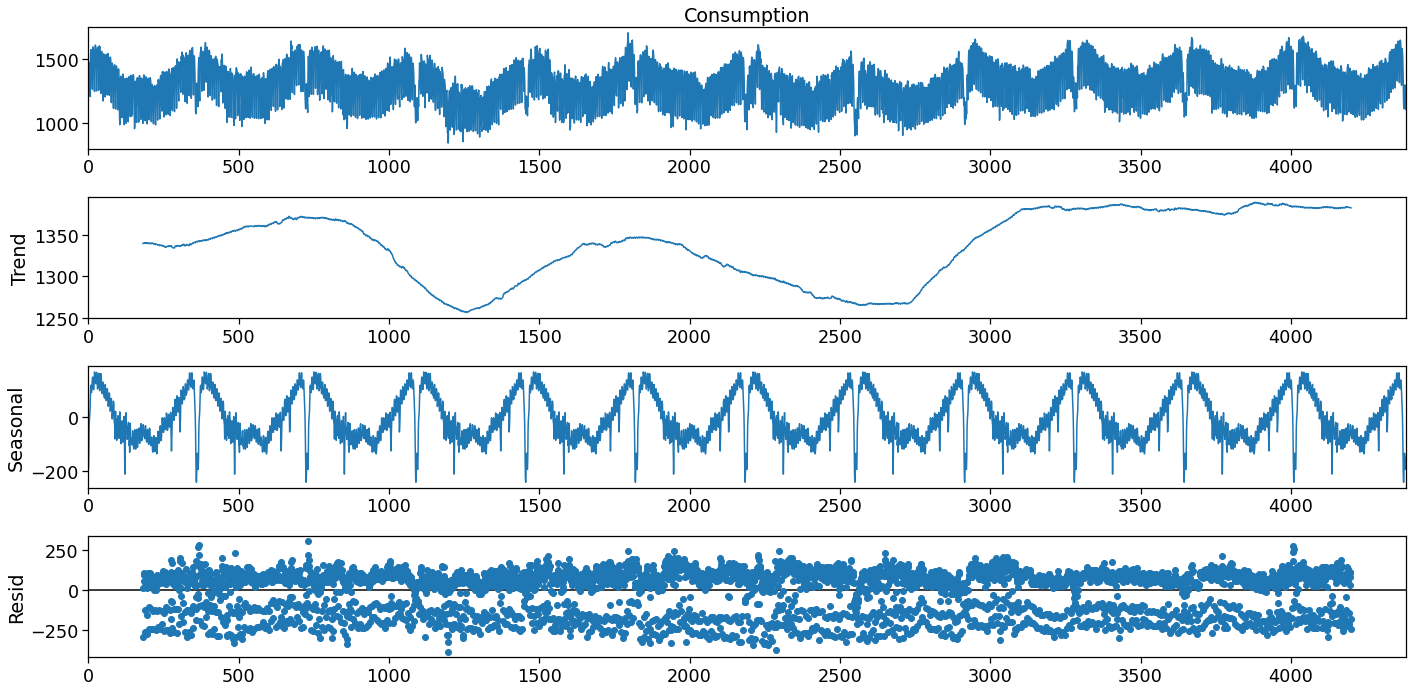

In [18]:
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

series = df['Consumption']
result = seasonal_decompose(series, model='additive', freq = 365)
result.plot()
plt.show()

breakdown each component trend and seasonal

# Stationarity

Stationarity may has an important role in forecasting. 
Stationarity mirrors the behaviour of the process that happen in the data.
There is some forecasting method that require stationarity for good performance
There is also some method that able to achieve good performance regardless stationarity.
<br>
Stationarity :
- Mean
- Variance


> ## Stationarity - Mean

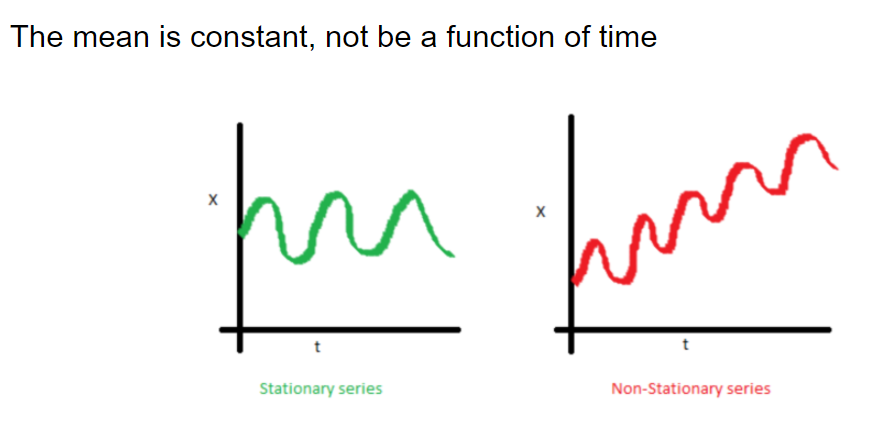

> ## Stationarity - Variance

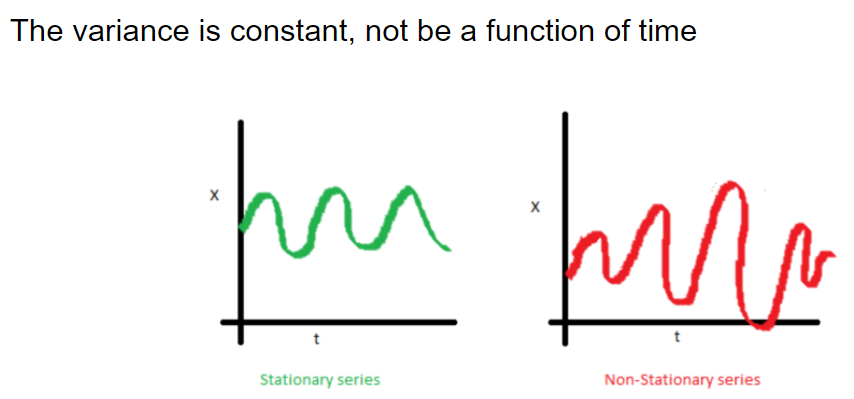

> ## Illustration

In [19]:
df_shampoo_stationare = df_shampoo.copy() 

In [20]:
df_shampoo_stationare['Sales Stationary'] = df_shampoo_stationare['Sales'].diff(1)
df_shampoo_stationare['Sales Stationary 2'] = df_shampoo_stationare['Sales Stationary'].diff(1)

# Another option
# # Differencing level 1 (1st order differencing)
# df_shampoo['Sales_Lag1'] = df_shampoo['Sales'].shift(1)
# df_shampoo['Sales_Diff1'] = df_shampoo['Sales'] - df_shampoo['Sales_Lag1']

# # Differencing level 2 (2nd order differencing)
# df_shampoo['Sales_Diff1_Lag1'] = df_shampoo['Sales_Diff1'].shift(1)
# df_shampoo['Sales_Diff2'] = df_shampoo['Sales_Diff1'] - df_shampoo['Sales_Diff1_Lag1']
# df_shampoo.head()

In [21]:
df_shampoo_stationare.head(10)

,Month,Sales,Sales Stationary,Sales Stationary 2
1,1-01,266.0,NaN,NaN
2,1-02,145.9,-120.1,NaN
3,1-03,183.1,37.2,157.3
4,1-04,119.3,-63.8,-101.0
5,1-05,180.3,61.0,124.8
6,1-06,168.5,-11.8,-72.8
7,1-07,231.8,63.3,75.1
8,1-08,224.5,-7.3,-70.6
9,1-09,192.8,-31.7,-24.4
10,1-10,122.9,-69.9,-38.2


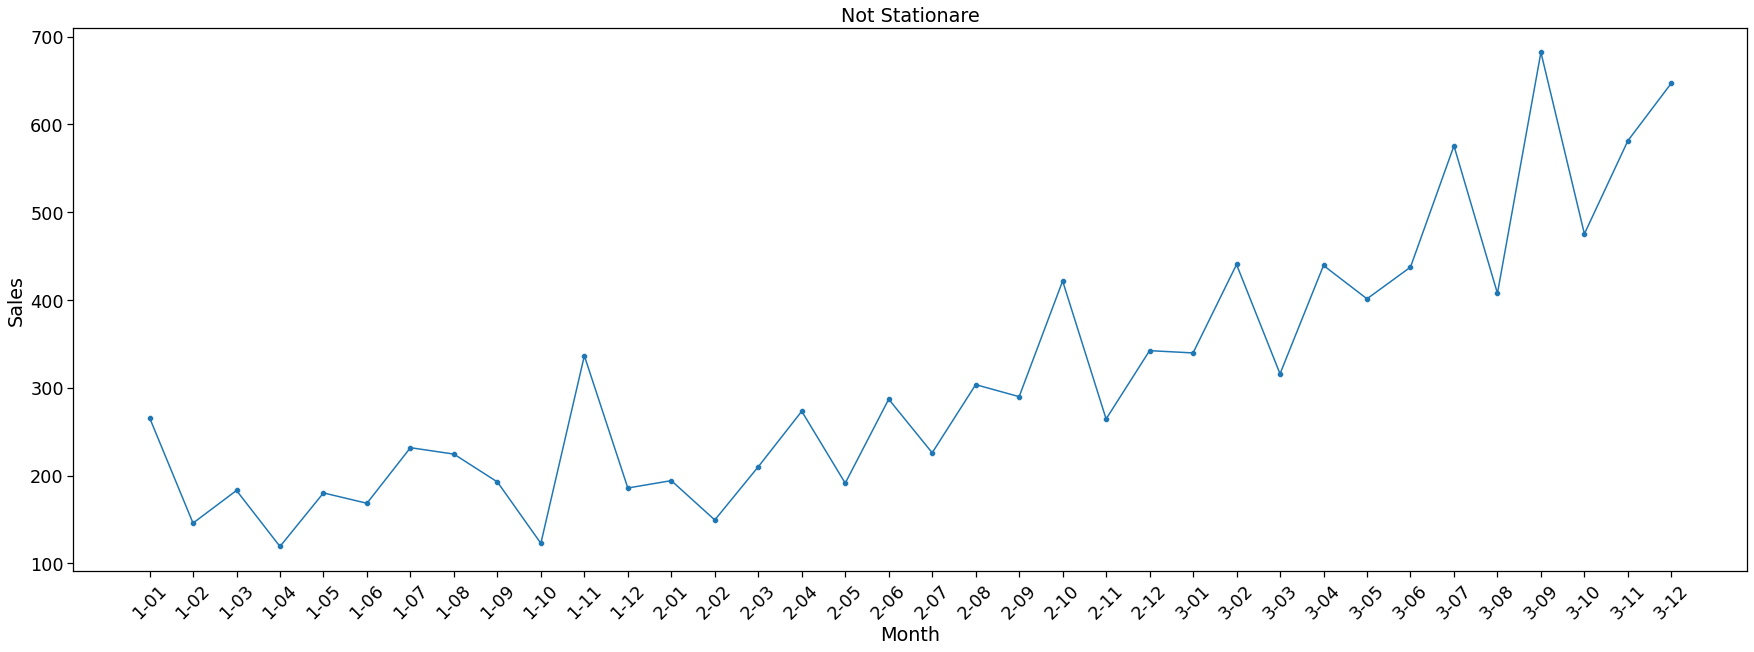

In [22]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.title('Not Stationare')
plt.xticks(rotation=45)

plt.show()

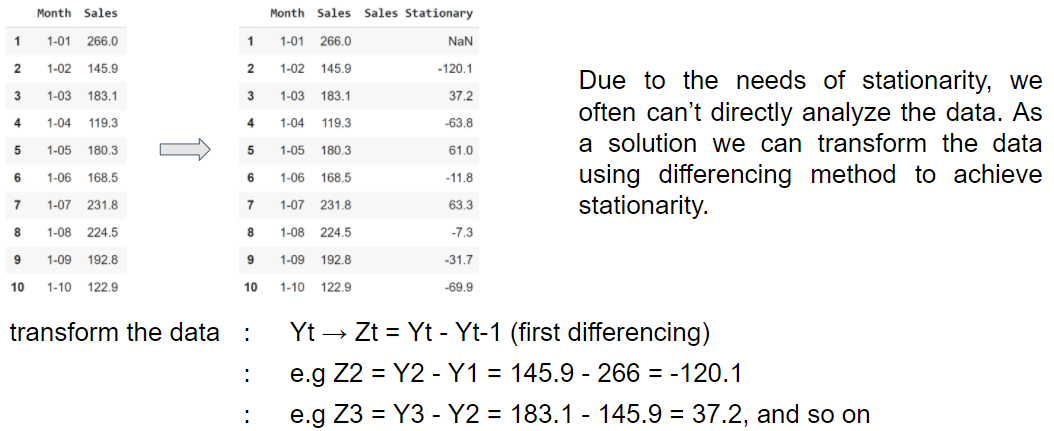

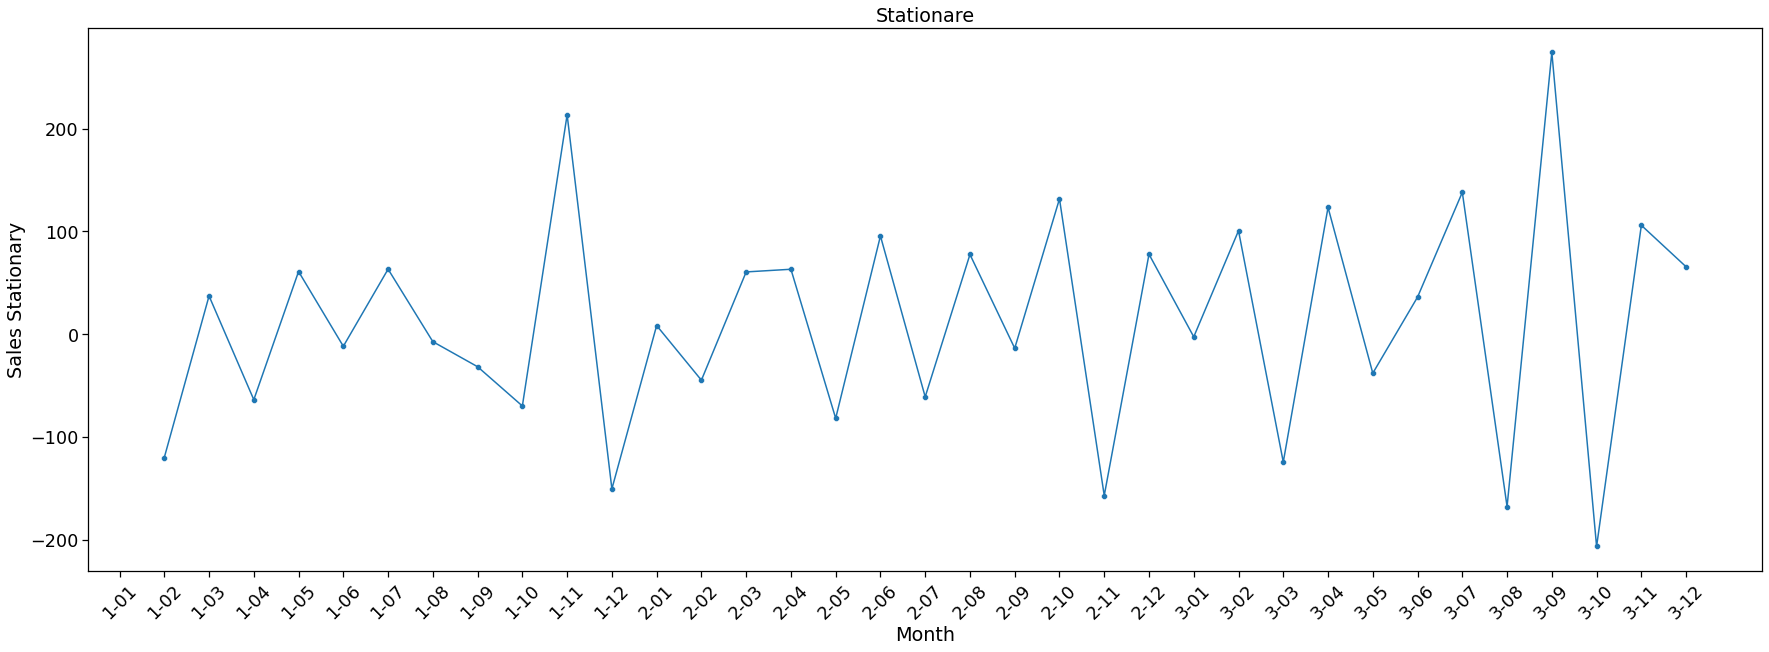

In [23]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales Stationary', data = df_shampoo_stationare)
sns.lineplot(x = 'Month', y = 'Sales Stationary', data = df_shampoo_stationare)

plt.title('Stationare')
plt.xticks(rotation=45)

plt.show()

# ARIMA Illustration

> ## Autoregressive (AR) : p

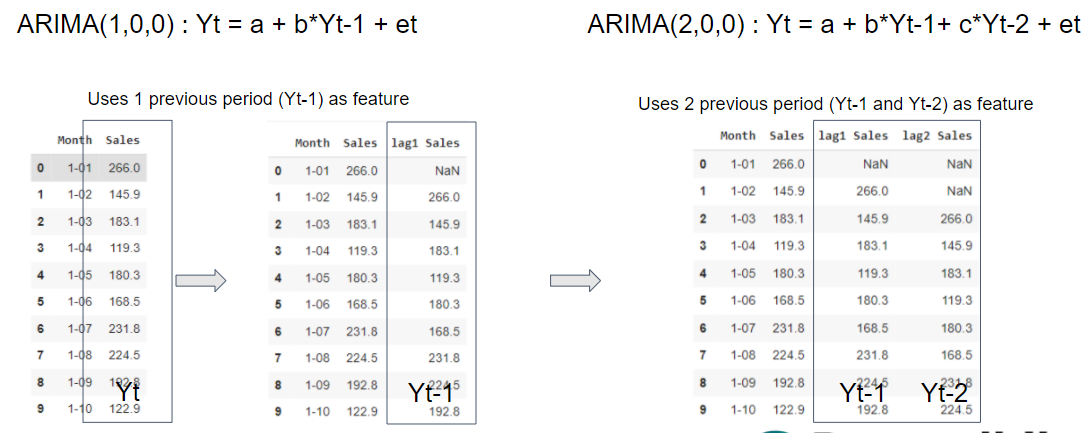

ARIMA (1,0,0) illustration

In [24]:
df_shampoo_ar = df_shampoo.copy() 

In [25]:
df_shampoo_ar.head(10)

,Month,Sales
1,1-01,266.0
2,1-02,145.9
3,1-03,183.1
4,1-04,119.3
5,1-05,180.3
6,1-06,168.5
7,1-07,231.8
8,1-08,224.5
9,1-09,192.8
10,1-10,122.9


In [26]:
df_shampoo_ar['lag1 Sales'] = df_shampoo_ar['Sales'].shift(1)

In [27]:
df_shampoo_ar.head(10)

,Month,Sales,lag1 Sales
1,1-01,266.0,NaN
2,1-02,145.9,266.0
3,1-03,183.1,145.9
4,1-04,119.3,183.1
5,1-05,180.3,119.3
6,1-06,168.5,180.3
7,1-07,231.8,168.5
8,1-08,224.5,231.8
9,1-09,192.8,224.5
10,1-10,122.9,192.8


ARIMA (2,0,0) illustration

In [28]:
df_shampoo_ar['lag2 Sales'] = df_shampoo_ar['Sales'].shift(2)

In [29]:
df_shampoo_ar.head(10)

,Month,Sales,lag1 Sales,lag2 Sales
1,1-01,266.0,NaN,NaN
2,1-02,145.9,266.0,NaN
3,1-03,183.1,145.9,266.0
4,1-04,119.3,183.1,145.9
5,1-05,180.3,119.3,183.1
6,1-06,168.5,180.3,119.3
7,1-07,231.8,168.5,180.3
8,1-08,224.5,231.8,168.5
9,1-09,192.8,224.5,231.8
10,1-10,122.9,192.8,224.5


> ## Integrated (I) : d

ARIMA (1,1,0) illustration

In [30]:
df_shampoo_i = df_shampoo.copy()

In [31]:
df_shampoo_i['lag1 Sales'] = df_shampoo_i['Sales'].shift(1)
df_shampoo_i['Sales Stationary'] = df_shampoo_i['Sales'] - df_shampoo_i['lag1 Sales']
df_shampoo_i['lag1 Sales Stationary'] = df_shampoo_i['Sales Stationary'].shift(1)
df_shampoo_i.head(10)

,Month,Sales,lag1 Sales,Sales Stationary,lag1 Sales Stationary
1,1-01,266.0,NaN,NaN,NaN
2,1-02,145.9,266.0,-120.1,NaN
3,1-03,183.1,145.9,37.2,-120.1
4,1-04,119.3,183.1,-63.8,37.2
5,1-05,180.3,119.3,61.0,-63.8
6,1-06,168.5,180.3,-11.8,61.0
7,1-07,231.8,168.5,63.3,-11.8
8,1-08,224.5,231.8,-7.3,63.3
9,1-09,192.8,224.5,-31.7,-7.3
10,1-10,122.9,192.8,-69.9,-31.7


> ## Moving Average (MA) : q


ARIMA (0,0,1) illustration

In [32]:
df_shampoo_ma = df_shampoo.copy()

In [33]:
df_shampoo_ma.head(10)

,Month,Sales
1,1-01,266.0
2,1-02,145.9
3,1-03,183.1
4,1-04,119.3
5,1-05,180.3
6,1-06,168.5
7,1-07,231.8
8,1-08,224.5
9,1-09,192.8
10,1-10,122.9


In [34]:
df_shampoo_ma['et = sales - mean(sales)'] = df_shampoo_ma['Sales'] - df_shampoo_ma['Sales'].mean() 
df_shampoo_ma['lag1 et = sales - mean(sales)'] = df_shampoo_ma['et = sales - mean(sales)'].shift(1)
df_shampoo_ma.drop('et = sales - mean(sales)', axis = 1, inplace = True)

In [35]:
df_shampoo_ma.head(10)

,Month,Sales,lag1 et = sales - mean(sales)
1,1-01,266.0,NaN
2,1-02,145.9,-46.6
3,1-03,183.1,-166.7
4,1-04,119.3,-129.5
5,1-05,180.3,-193.3
6,1-06,168.5,-132.3
7,1-07,231.8,-144.1
8,1-08,224.5,-80.8
9,1-09,192.8,-88.1
10,1-10,122.9,-119.8


ARIMA (1,0,1) illustration

In [36]:
import statsmodels.api as sm
from statsmodels.api import OLS

In [37]:
df_shampoo_ma = df_shampoo.copy()

In [38]:
df_shampoo_ma['lag1 Sales'] = df_shampoo_ma['Sales'].shift(1) 

In [39]:
df_shampoo_ma.head(10)

,Month,Sales,lag1 Sales
1,1-01,266.0,NaN
2,1-02,145.9,266.0
3,1-03,183.1,145.9
4,1-04,119.3,183.1
5,1-05,180.3,119.3
6,1-06,168.5,180.3
7,1-07,231.8,168.5
8,1-08,224.5,231.8
9,1-09,192.8,224.5
10,1-10,122.9,192.8


In [40]:
sm_lm = OLS(df_shampoo_ma[1:]['Sales'], sm.add_constant(df_shampoo_ma[1:][['lag1 Sales']]))
result = sm_lm.fit()

In [41]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     35.42
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           1.11e-06
Time:                        13:51:34   Log-Likelihood:                -211.98
No. Observations:                  35   AIC:                             428.0
Df Residuals:                      33   BIC:                             431.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.0456     43.525      1.793      0.0

In [42]:
df_shampoo_ma['et-1'] = [np.nan] + list(result.resid)

In [43]:
df_shampoo_ma.head(10)

,Month,Sales,lag1 Sales,et-1
1,1-01,266.0,NaN,NaN
2,1-02,145.9,266.0,-139.193703
3,1-03,183.1,145.9,-8.510723
4,1-04,119.3,183.1,-101.266317
5,1-05,180.3,119.3,9.394083
6,1-06,168.5,180.3,-49.886864
7,1-07,231.8,168.5,22.597975
8,1-08,224.5,231.8,-33.973237
9,1-09,192.8,224.5,-59.991091
10,1-10,122.9,192.8,-105.216566


# ACF-PACF

We can use ACF-PACF to determine the best combination of p d and q.
ACF is a measured of the correlation between the time series and their own lags.
PACF measures the correlation between the time series with their own lags but partially.

Model Specification (stationary condition) :
1. PACF Cut off lag p, ACF Tails Off --> AR(p)
1. ACF Cut off lag q, PACF Tails Off --> MA(q)
1. PACF Cut off lag p, ACF Cut off lag q --> AR(p) or MA(q)
1. ACF and PACF tails off -->  choose all possible combination

In [44]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

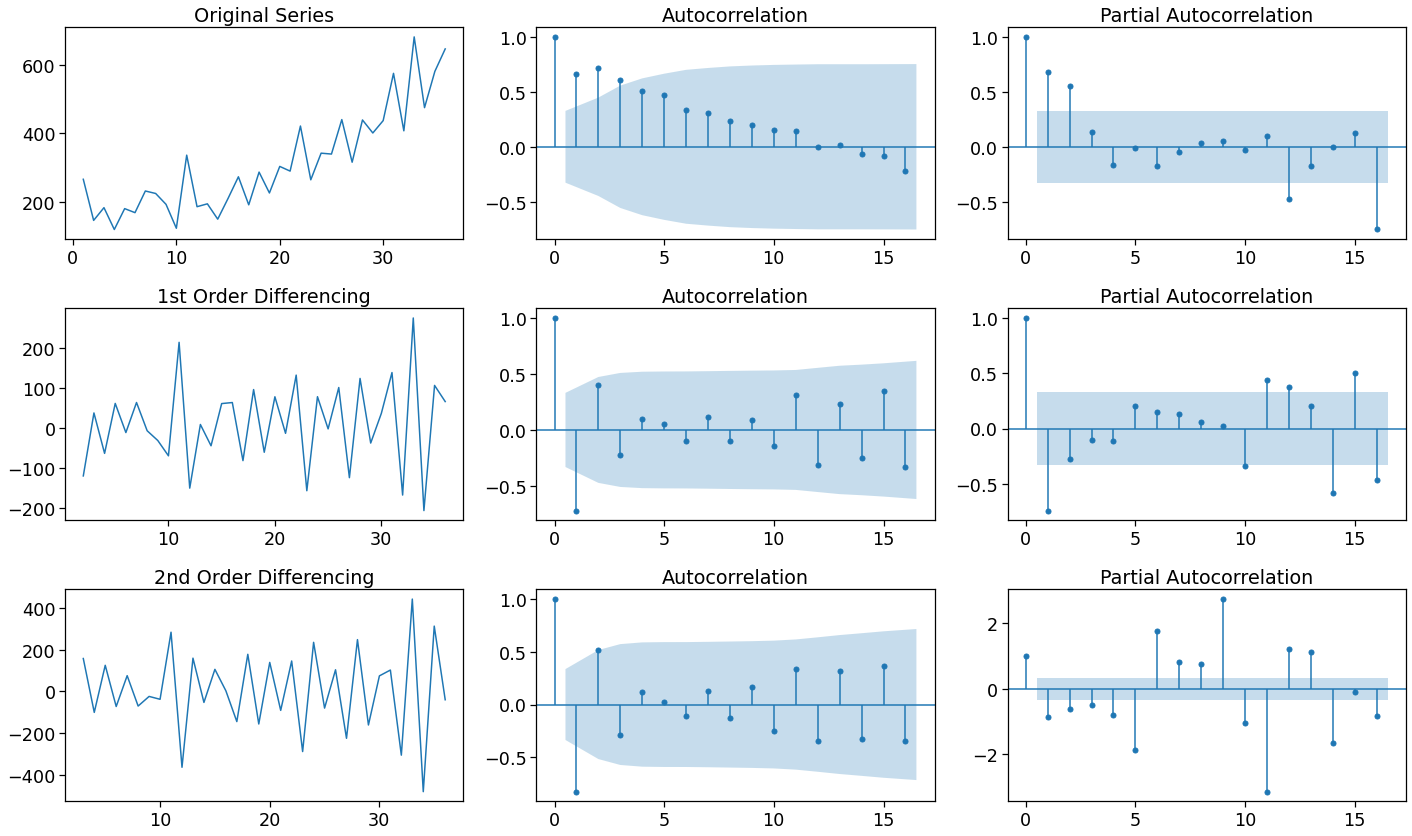

In [45]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df_shampoo_i['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo_i['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo_i['Sales'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_shampoo_i['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_shampoo_i['Sales Stationary'].diff(1)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_shampoo_i['Sales Stationary'].diff(1).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo_i['Sales Stationary'].diff(1).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

Model Candidates Based on ACF PACF :
1. ARIMA(2,1,0)
1. ARIMA(0,1,2)

# Time Series ARIMA

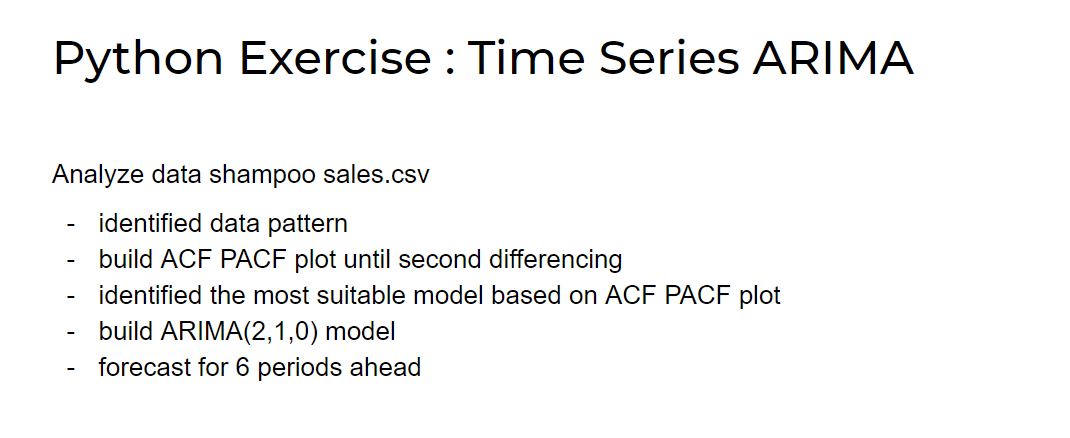

In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

> ## Data

In [48]:
df_shampoo = pd.read_csv('shampoo_sales.csv')

In [49]:
df_shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [50]:
df_shampoo.tail()

,Month,Sales
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


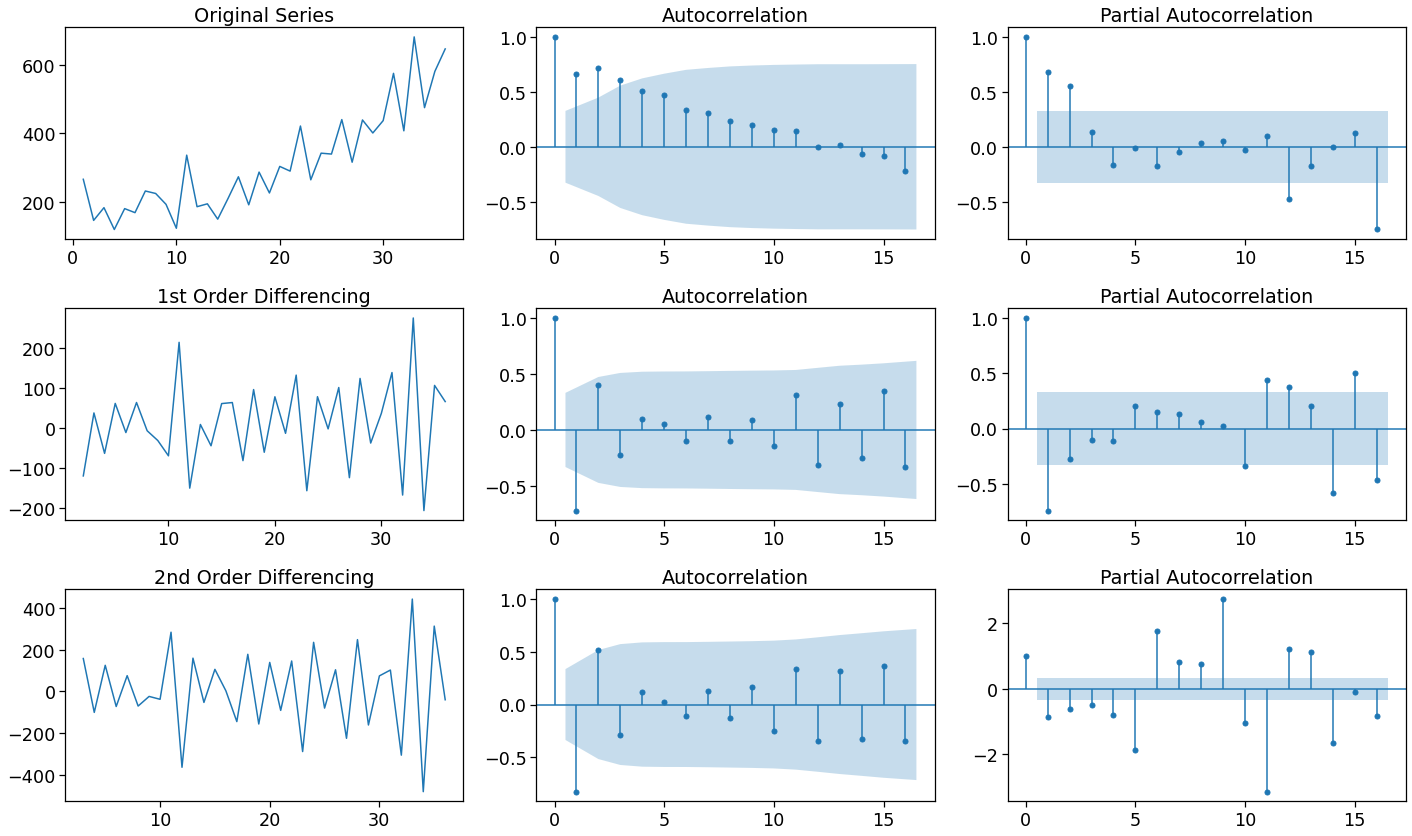

In [73]:
# Original Series
fig, axes = plt.subplots(3, 3, figsize = (20,12))
axes[0, 0].plot(df_shampoo_i['Sales']); axes[0, 0].set_title('Original Series')
plot_acf(df_shampoo_i['Sales'], ax=axes[0, 1])
plot_pacf(df_shampoo_i['Sales'], ax=axes[0, 2])

# 1st Differencing
axes[1, 0].plot(df_shampoo_i['Sales'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 1])
plot_pacf(df_shampoo_i['Sales'].diff().dropna(), ax=axes[1, 2])

# 2nd Differencing
axes[2, 0].plot(df_shampoo_i['Sales Stationary'].diff(1)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df_shampoo_i['Sales Stationary'].diff(1).dropna(), ax=axes[2, 1])
plot_pacf(df_shampoo_i['Sales Stationary'].diff(1).dropna(), ax=axes[2, 2])

plt.tight_layout()
plt.show()

> ## EDA

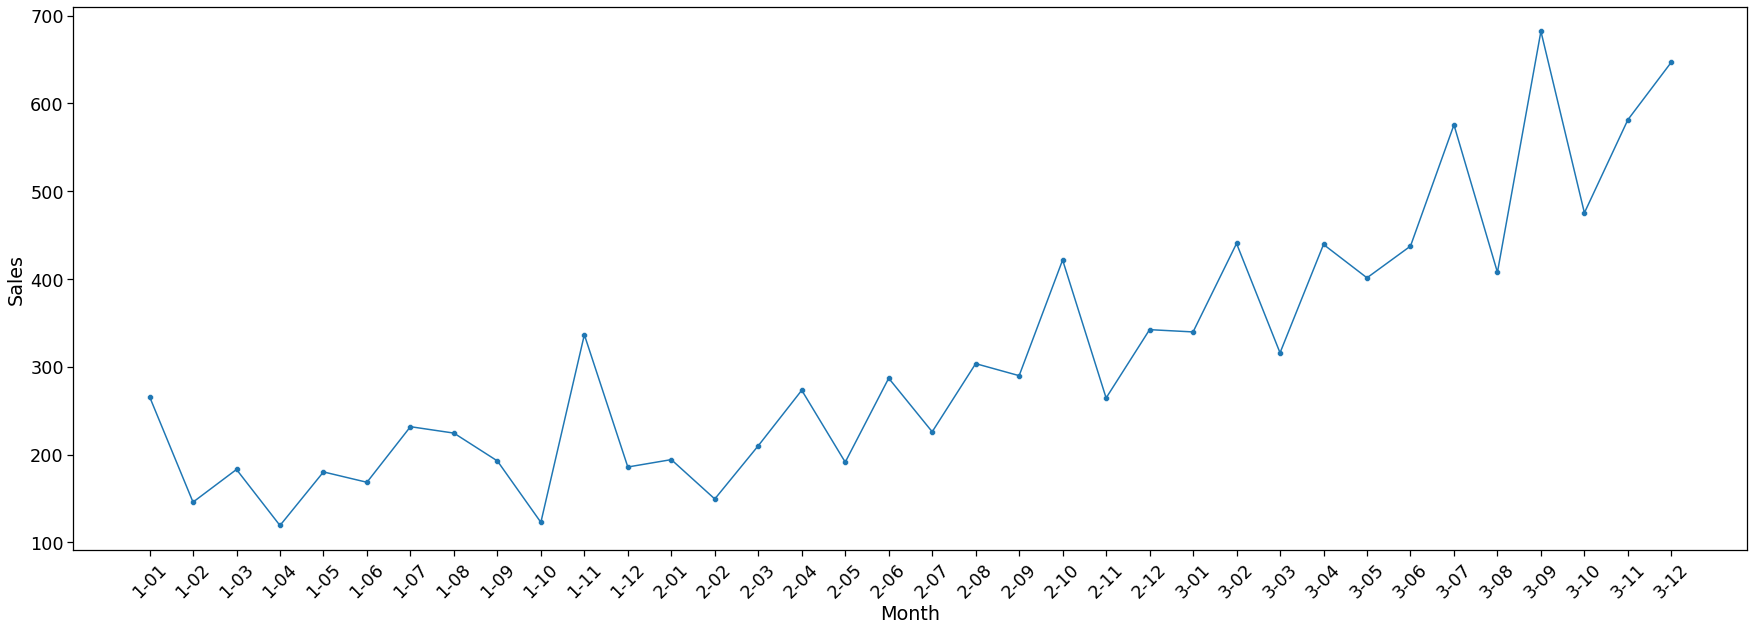

In [51]:
plt.figure(figsize = (30,10))

sns.set_context(context = 'notebook', font_scale=1.6)

sns.scatterplot(x = 'Month' , y = 'Sales', data = df_shampoo)
sns.lineplot(x = 'Month', y = 'Sales', data = df_shampoo)

plt.xticks(rotation=45)

plt.show()

> ## Modeling

Candidates :
1. ARIMA(2,1,0)
2. ARIMA(0,1,2)

In [53]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(endog=df_shampoo['Sales'], order=(2,1,0))
model_fit = model.fit()

In [54]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -200.188
Date:                Wed, 13 Apr 2022   AIC                            406.376
Time:                        13:52:08   BIC                            411.042
Sample:                             0   HQIC                           407.987
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9139      0.225     -4.067      0.000      -1.354      -0.473
ar.L2         -0.2630      0.189     -1.392      0.164      -0.633       0.107
sigma2      5311.7175   1383.504      3.839      0.0

> ## Forecasting

In [55]:
forecast_length = 6
forecast_result = model_fit.forecast(forecast_length)

In [64]:
print('Forecasted value\n\n', forecast_result)

Forecasted value

 36    559.074667
37    622.088320
38    587.594386
39    602.548534
40    597.952350
41    598.220507
Name: predicted_mean, dtype: float64


In [ ]:
Month = []

for i in range(1,forecast_length+1):
  Month.append('4-'+str(i))

In [ ]:
df_shampoo.tail(6)

,Month,Sales
30,3-07,575.5
31,3-08,407.6
32,3-09,682.0
33,3-10,475.3
34,3-11,581.3
35,3-12,646.9


In [ ]:
df_sales_F = pd.DataFrame({
    'Month':Month,
    'Sales':forecast_result[0],
})

In [ ]:
df_sales_F = df_shampoo[-1:].append(df_sales_F)

In [ ]:
df_sales_F

,Month,Sales
35,3-12,646.900000
0,4-1,568.908268
1,4-2,652.481632
2,4-3,623.370954
3,4-4,650.402073
4,4-5,661.228145
5,4-6,668.099172


In [ ]:
df_forecast = pd.DataFrame({
    'Month':Month,
    'forecast':forecast_result[0],
    'se':forecast_result[1],
    'lower bound':forecast_result[2][:,0],
    'upper bound':forecast_result[2][:,1]
})

In [ ]:
df_forecast

,Month,forecast,se,lower bound,upper bound
0,4-1,568.908268,67.832505,435.959001,701.857535
1,4-2,652.481632,67.849407,519.499238,785.464026
2,4-3,623.370954,81.187453,464.246471,782.495437
3,4-4,650.402073,84.329605,485.119084,815.685062
4,4-5,661.228145,88.926262,486.935874,835.520416
5,4-6,668.099172,94.058735,483.747439,852.450905


In [ ]:
fig = go.Figure([go.Scatter(name = 'true',x=df_shampoo['Month'], y=df_shampoo['Sales'])])
fig.add_trace(go.Scatter(name = 'forecast',x=df_sales_F['Month'], y=df_sales_F['Sales']))
fig.add_trace(go.Scatter(name = 'lower bound',x=df_forecast['Month'], y=df_forecast['lower bound']))
fig.add_trace(go.Scatter(name = 'upper bound',x=df_forecast['Month'], y=df_forecast['upper bound']))
fig.update_xaxes(rangeslider_visible=True)
fig.show()